In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
import pandas as pd
data=pd.read_csv('/content/advertising.csv')

In [ ]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
data.mean()

,0
TV,147.0425
Radio,23.2640
Newspaper,30.5540
Sales,15.1305


In [ ]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [ ]:
categorial_cols=data.select_dtypes(include=['object']).columns
label_encoder=LabelEncoder()
for col in categorial_cols:
  data[col]=label_encoder.fit_transform(data[col])
  label_encoders[col]=label_encoder
#

NameError: name 'data' is not defined

In [ ]:
!pip install scikit-learn  # Install scikit-learn if you haven't already

import pandas as pd
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

categorial_cols = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
label_encoders = {}  # Initialize label_encoders dictionary

for col in categorial_cols:
    data[col] = label_encoder.fit_transform(data[col])
    label_encoders[col] = label_encoder


In [ ]:
x=data.drop('Sales',axis=1)
y=data['Sales']


In [ ]:
data.drop

<bound method DataFrame.drop of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [ ]:
!pip install scikit-learn # Install scikit-learn for StandardScaler
from sklearn.preprocessing import StandardScaler # Correct way to import StandardScaler
#Rest of your code
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
from sklearn.ensemble import RandomForestRegressor as rf # Import RandomForestRegressor from sklearn.ensemble

In [ ]:
rf_model=RandomForestRegressor(random_state=45)

Cross check using k-fold

In [ ]:
from sklearn.model_selection import KFold # Import KFold from sklearn.model_selection

Kf = KFold(n_splits=5, shuffle=True, random_state=45) # Use the imported KFold class to create an instance

In [ ]:
from sklearn.ensemble import RandomForestRegressor as rf # Import RandomForestRegressor from sklearn.ensemble
from sklearn.model_selection import KFold, cross_val_score # Import KFold and cross_val_score from sklearn.model_selection

rf_model=RandomForestRegressor(random_state=45)


Kf = KFold(n_splits=5, shuffle=True, random_state=45) # Use the imported KFold class to create an instance

# Now you can use cross_val_score because it's imported
cv_results=cross_val_score(rf_model,x_scaled,y,cv=Kf,scoring='neg_mean_squared_error')
print(cv_results)
print(cv_results.mean())

[-1.55141842 -1.24210327 -2.09963705 -1.25319815 -0.92137877]
-1.4135471349999993


In [ ]:
param_grid={
    'n_estimators':[100,200,300],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}
grid_search=GridSearchCV(estimator=rf_model,param_grid=param_grid,cv=Kf,n_jobs=-1,verbose=2)
grid_search.fit(x,y)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=45, shuffle=True),
             estimator=RandomForestRegressor(random_state=45), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [ ]:
grid_search.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
rf_model=grid_search.best_estimator_
y_pred=rf_model.predict(x)

In [ ]:
mae=mean_absolute_error(y,y_pred)
mse=mean_squared_error(y,y_pred)
rmse=mean_squared_error(y,y_pred,squared=False)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
rmse.mean()

0.4346553045230215

In [ ]:
mse.mean()

0.18892523375000053

In [ ]:
mae.mean()

0.3134525000000026

In [ ]:
importances=rf_model.feature_importances_
feature_names=data.drop('Sales',axis=1).columns

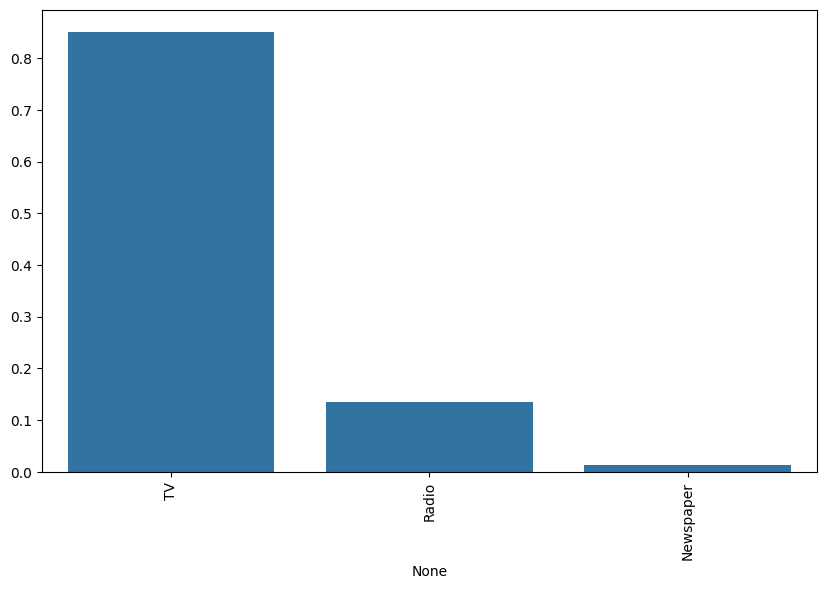

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=feature_names,y=importances)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Actual vs. Predicted Sales')

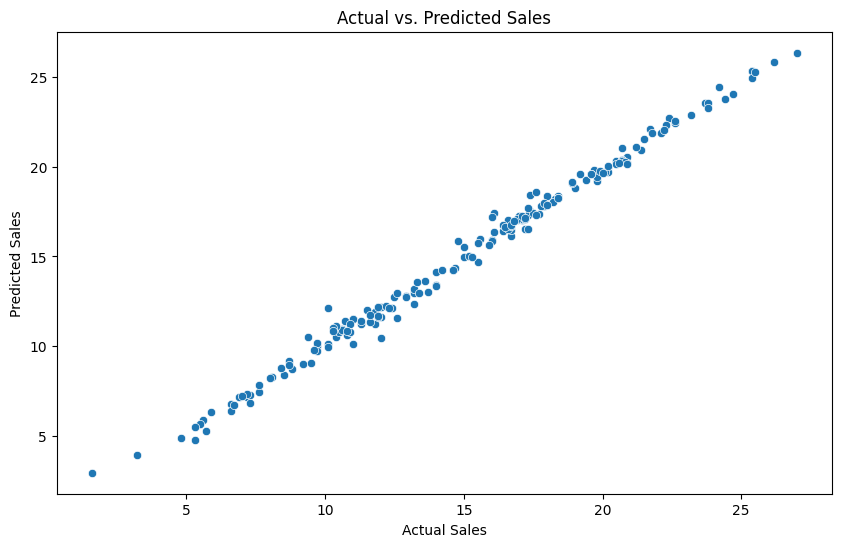

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=y,y=y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')

Text(0.5, 1.0, 'Residual Plot')

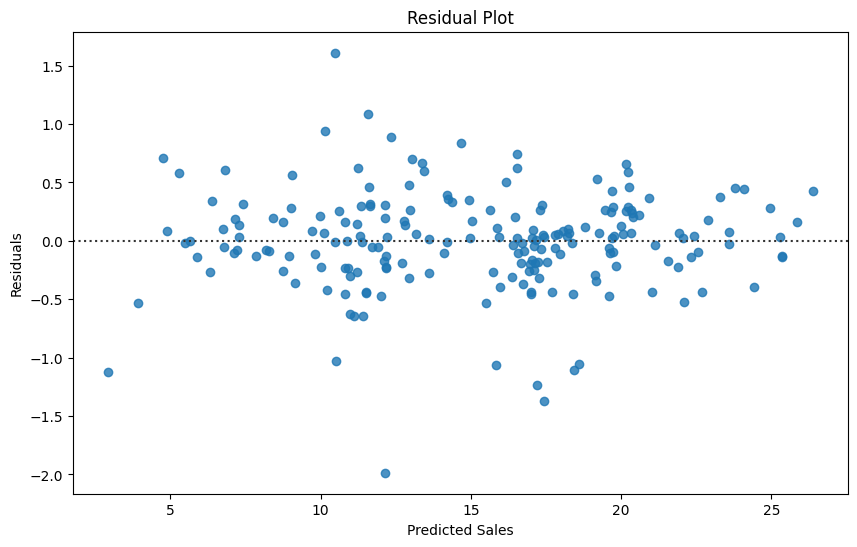

In [ ]:
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred,y=y-y_pred)
plt.xlabel('Predicted Sales')
plt.ylabel('Residuals')
plt.title('Residual Plot')
#

Text(0.5, 1.0, 'Distribution of Residuals')

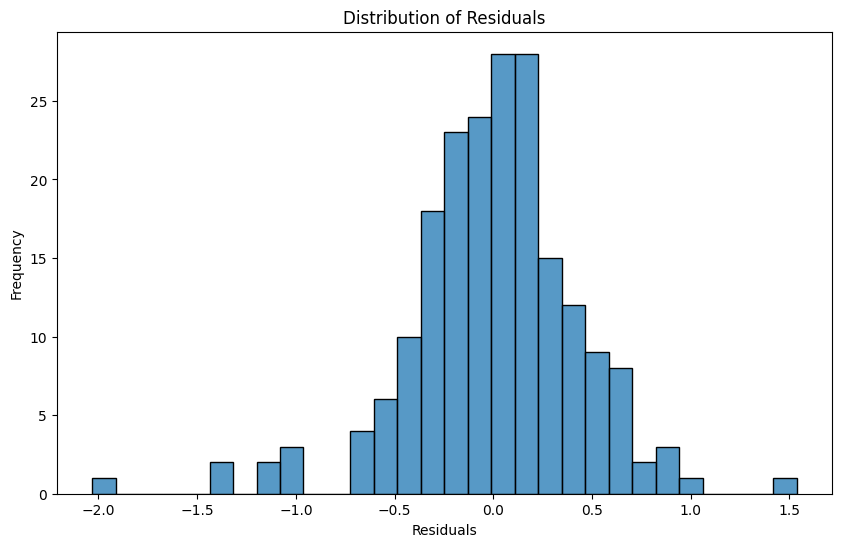

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(y-y_pred,bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
#

Text(0.5, 1.0, 'Actual vs. Predicted Sales')

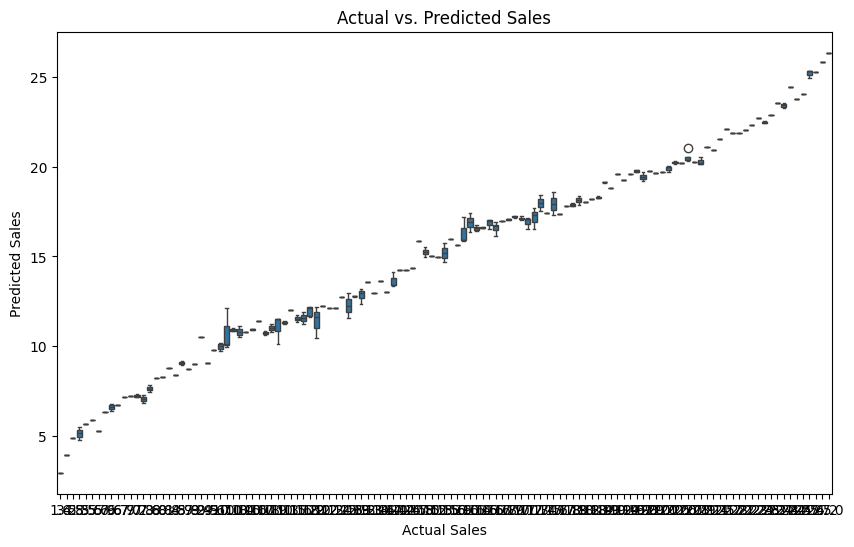

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x=y,y=y_pred)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales')


Text(0.5, 1.0, 'Correlation Heatmap')

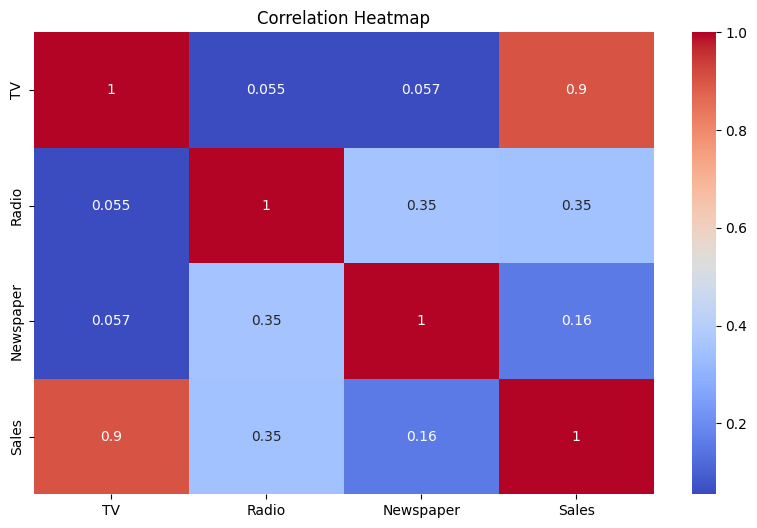

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')


<Figure size 1000x600 with 0 Axes>

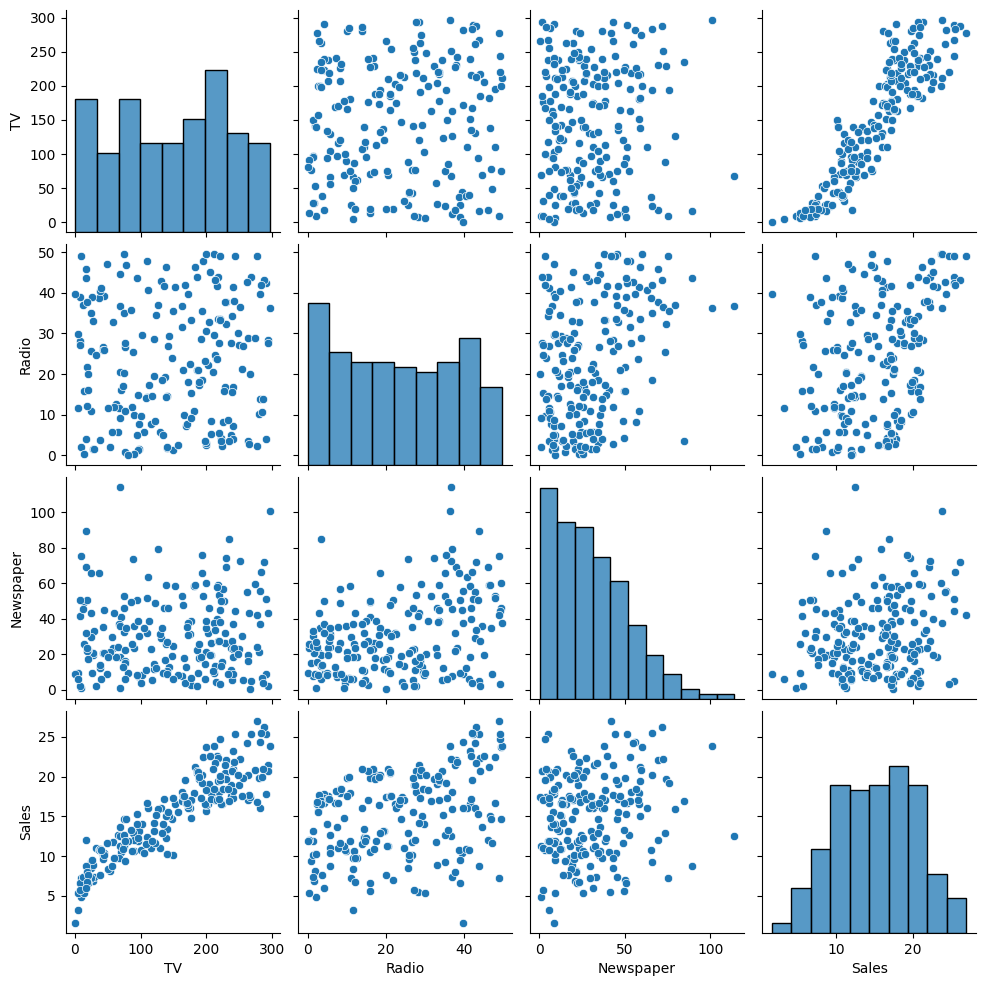

In [ ]:
plt.figure(figsize=(10,6))
sns.pairplot(data)
plt.show()

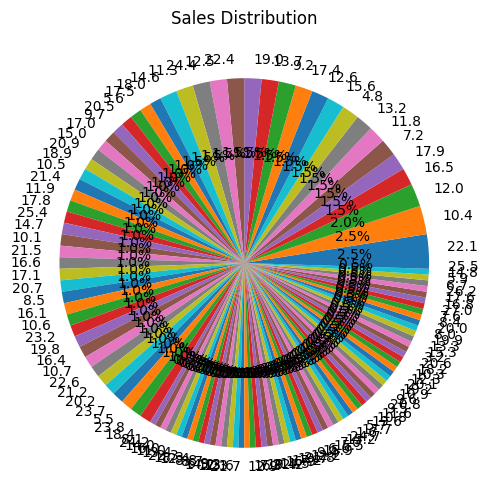

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Use matplotlib.pyplot.pie directly for creating pie charts
plt.pie(data['Sales'].value_counts(), labels=data['Sales'].unique(), autopct='%1.1f%%')
plt.title('Sales Distribution')
plt.show()

Text(0.5, 1.0, 'TV Distribution')

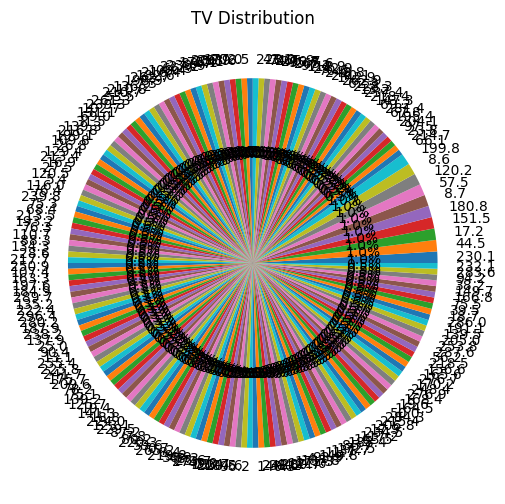

In [ ]:
plt.figure(figsize=(10, 6))
# Use matplotlib.pyplot.pie directly for creating pie charts
plt.pie(data['TV'].value_counts(), labels=data['TV'].unique(), autopct='%1.1f%%')
plt.title('TV Distribution')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

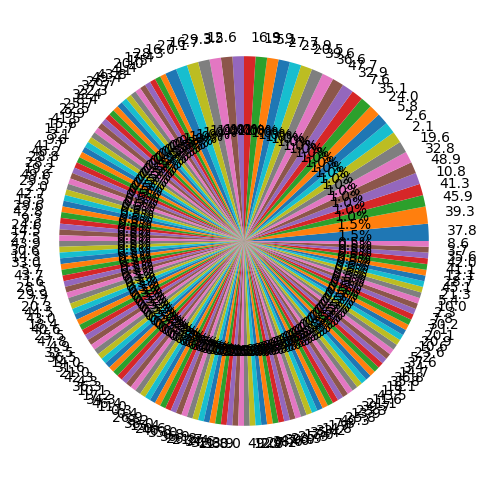

In [ ]:
plt.figure(figsize=(10, 6))
# Use matplotlib.pyplot.pie directly for creating pie charts
plt.pie(data['Radio'].value_counts(), labels=data['Radio'].unique(), autopct='%1.1f%%')
plt

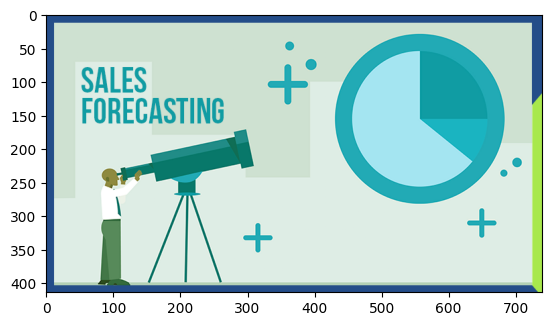

In [59]:
imgpath='/content/Sales-Forecasting.png'
img=plt.imread(imgpath)
plt.imshow(img)


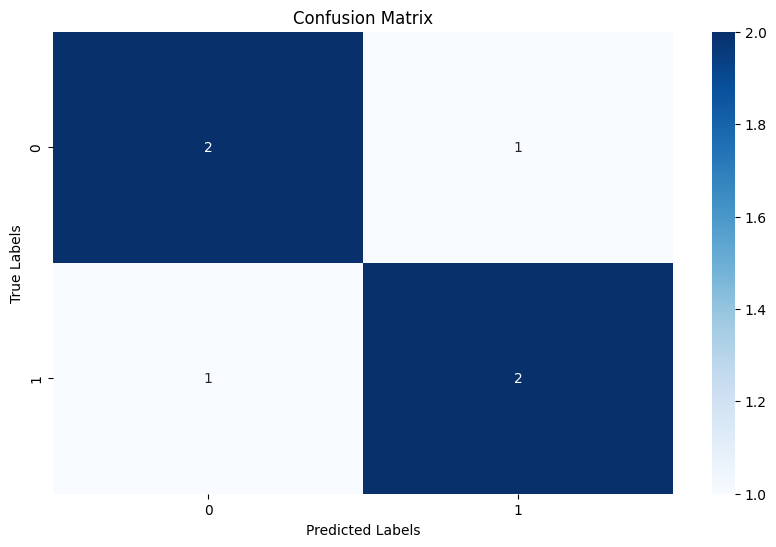

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_true = [0, 1, 0, 1, 1, 0]
y_pred = [1, 1, 0, 1, 0, 0]

confusion_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()